# Exploration and Analysis
by Wilson Lee

    -Data Exploration and Analysis for the in class Kaggle competition "CEBD 1260 - Classification - Predict Adoption Speed"
    -Data Source https://www.kaggle.com/c/cedb1260c/data

## Import Libraries

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Processed Data

In [2]:
df_train = pd.read_csv("../../Data/Processed/train_cleaned.csv")
df_test = pd.read_csv("../../Data/Processed/test_cleaned.csv")

## Preview Data

In [3]:
df_train

,Age,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,Type_1,Type_2,Probability,a,a g,...,State_41332,State_41335,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415,fee_per_pet
0,36,0,3f8824a3b,1.0,4,1,0,16.541052,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,3,0,9238eb7fc,1.0,2,0,1,0.133396,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,7,0,f0a1f2b90,2.0,4,0,1,16.541052,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,3,0,7d028bdea,4.0,2,1,0,9.364370,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,1,0,8377bfe97,0.0,2,0,1,0.006670,0,0,...,0,0,0,0,0,0,0,1,0,0.0
5,3,0,965b31ba7,2.0,1,1,0,0.026679,0,0,...,0,0,0,0,0,0,0,0,0,0.0
6,2,0,3760c73b1,1.0,4,1,0,0.006670,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,8,0,f41a7de83,2.0,4,1,0,16.541052,0,0,...,0,0,1,0,0,0,0,0,0,0.0
8,1,0,7b660c6af,4.0,3,0,1,9.364370,0,0,...,0,0,0,0,0,0,0,0,0,0.0
9,6,0,f94c2a347,2.0,4,1,0,0.006670,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_test

,Age,VideoAmt,PetID,PhotoAmt,Type_1,Type_2,Probability,Breed_0,Breed_1,Breed_2,...,State_41332,State_41335,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415,fee_per_pet
0,1,0,f42161740,10.0,0,1,0.000067,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,6,0,0118db3a8,2.0,1,0,0.001401,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,2,0,e5164d828,2.0,1,0,0.000600,0,0,0,...,0,0,0,0,0,0,0,1,0,0.000000
3,10,0,5335bfb38,0.0,1,0,0.000067,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,12,0,ff2cf88a0,2.0,1,0,0.000133,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
5,1,0,1d13441b9,1.0,0,1,0.000067,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
6,4,0,7d835cf7c,9.0,0,1,0.001467,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
7,3,0,577d15fea,1.0,1,0,0.001401,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
8,2,0,91736f444,4.0,1,0,0.008337,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000000
9,2,0,db194aec8,6.0,0,1,0.006736,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


## Get Column List

In [5]:
list_of_all_columns = df_train.columns.values
print(list_of_all_columns)

['Age' 'VideoAmt' 'PetID' ... 'State_41401' 'State_41415' 'fee_per_pet']


## Check Log Price Distribution

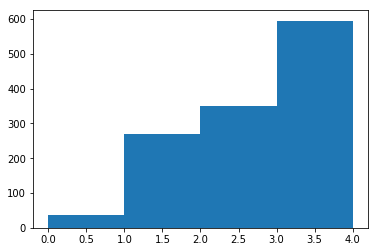

In [6]:
# Analize pricing distribution

# Histogram
plt.hist(df_train['AdoptionSpeed'], bins=4, label="AdoptionSpeed")
plt.show()


## Plot Columns

In [7]:
def plotfunction(x,y):
    plt.figure(figsize=(10,10))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(df_train[x], df_train[y], 'o', alpha=0.01)
    plt.show()
    

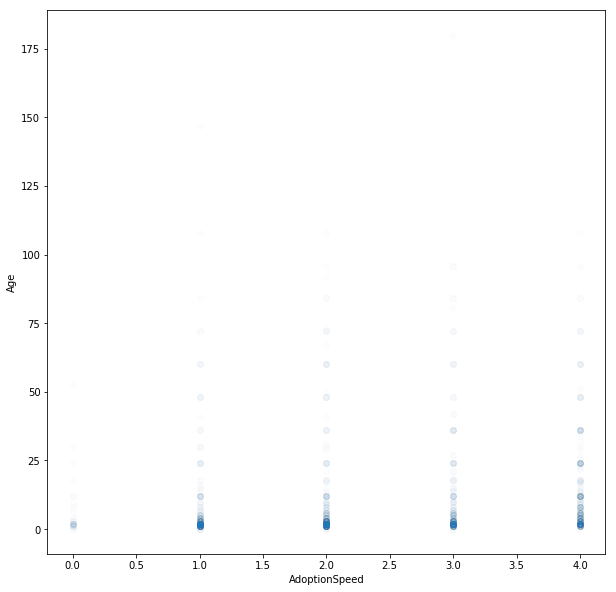

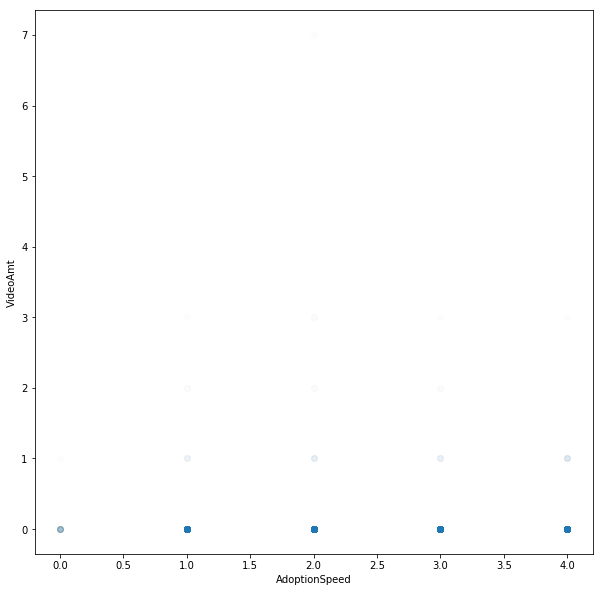

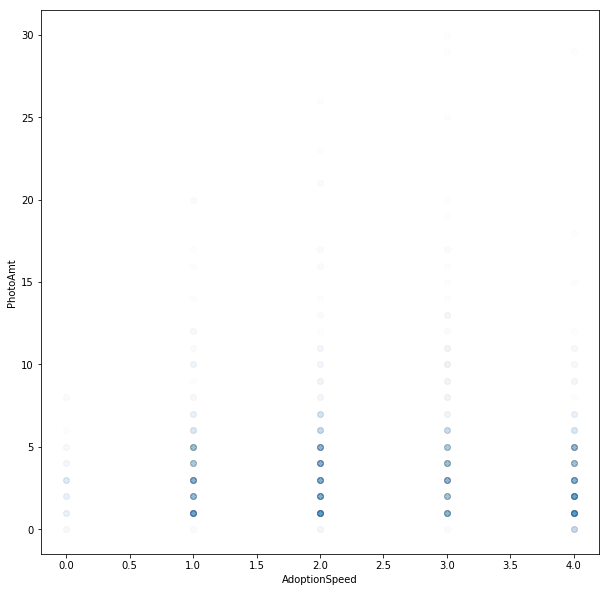

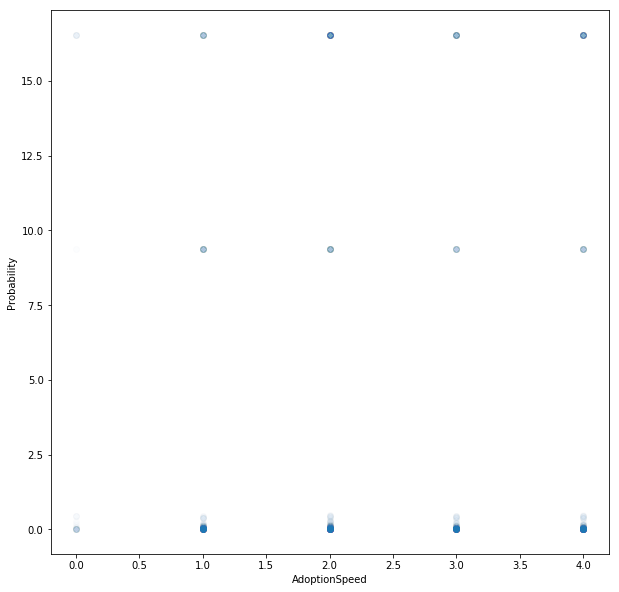

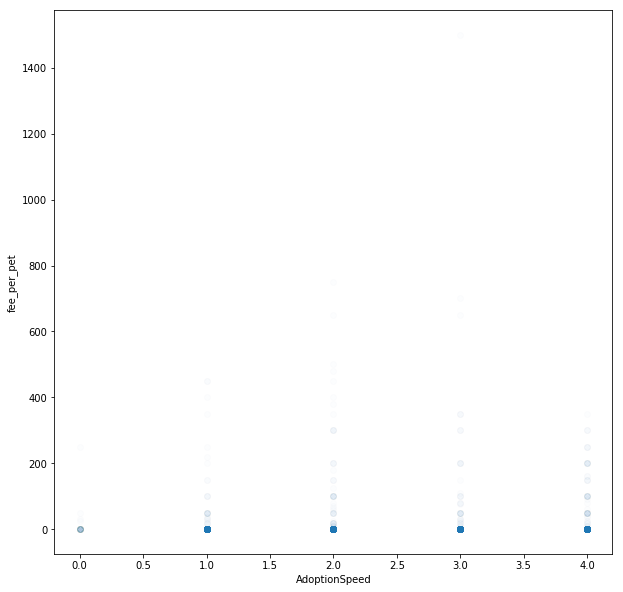

In [8]:
list_of_standard_columns = ['Age', 'VideoAmt','PhotoAmt', 'Probability','fee_per_pet']
for column in list_of_standard_columns:
    plotfunction('AdoptionSpeed', column)